<a href="https://colab.research.google.com/github/SeEun-Kwon/data_analysis/blob/main/%EC%8B%A4%EC%8A%B51_%EC%9E%90%EB%8F%99%EC%B0%A8_%EB%A6%AC%EC%BD%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **자동차결함 리콜현황**

제조사별/ 모델별/ 월별/ 생산연도별 리콜 현황


https://www.data.go.kr/data/3048950/fileData.do



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 한글 깨짐 방지 코드
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    !sudo apt-get -qq -y install fonts-nanum      # fonts-nanum 패키지 설치
    import matplotlib.font_manager as fm          # Matplotlib의 폰트 매니저 가져오기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])  # 나눔 폰트의 시스템 경로 찾기
    for fpath in font_files:                       # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
        fm.fontManager.addfont(fpath)

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
df = pd.read_csv('/content/한국교통안전공단_자동차결함 리콜현황_20231231.csv', encoding='euc-kr')

In [ ]:
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,현대자동차(주),포터2 (HR),2023-03-07,2023-03-08,2023-04-10,현대자동차㈜에서는 포터2(HR) 일부 차량에서 변속 케이블 브라켓 체결 작업 불량으...
1,비엠더블유코리아(주),M240i xDrive Coupe,2023-03-14,2023-03-29,2023-04-26,무선 충전용 트레이 장치의 소프트웨어 오류로 디지털 키 사용 시 시동을 끈 상태에서...
2,비엠더블유코리아(주),iX3 M Sport,2023-03-27,2023-04-07,2023-04-26,무선 충전용 트레이 장치의 소프트웨어 오류로 디지털 키 사용 시 시동을 끈 상태에서...
3,메르세데스벤츠코리아(주),Maybach S 580 4MATIC,2020-09-11,2020-10-28,2023-05-12,개발 공정 오류로 인하여 전방 차체 벽면 실링의 수밀성이 부족할 수 있어 비가 많이...
4,메르세데스벤츠코리아(주),S 580 4MATIC,2020-07-09,2020-07-09,2023-05-12,개발 공정 오류로 인하여 전방 차체 벽면 실링의 수밀성이 부족할 수 있어 비가 많이...


In [ ]:
df.tail()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
936,메르세데스벤츠코리아(주),GLE 450 4MATIC,2022-02-22,2022-02-28,2023-12-29,연료 펌프 내부 임펠러(impeller)의 내구성이 부족하여 작동 중 변형될 수 있...
937,메르세데스벤츠코리아(주),EQE 350+,2021-12-10,2021-12-21,2023-12-22,특정 상황에서 과전압(voltage peak)이 발생한 경우 고전압 배터리 컨트롤러...
938,비엠더블유코리아(주),BMW i5 M60 xDrive,2023-06-27,2023-12-14,2023-12-27,수신기 오디오 모듈의 소프트웨어 오류로 차량 주행 중 '보행자 경고음'이 발생하지 ...
939,비엠더블유코리아(주),BMW i5 eDrive 40,2023-06-29,2023-12-14,2023-12-27,수신기 오디오 모듈의 소프트웨어 오류로 차량 주행 중 '보행자 경고음'이 발생하지 ...
940,현대자동차(주),싼타페 하이브리드(MX5 HEV),2023-11-01,2023-11-18,2023-12-08,일부 차량에서 전방카메라 소프트웨어 설정 오류로 인해 첨단 운전자 보조 시스템(AD...


In [ ]:
df.info()     # object: 모든 데이터타입 담을 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       941 non-null    object
 1   차명        941 non-null    object
 2   생산기간(부터)  941 non-null    object
 3   생산기간(까지)  941 non-null    object
 4   리콜개시일     941 non-null    object
 5   리콜사유      941 non-null    object
dtypes: object(6)
memory usage: 44.2+ KB


In [ ]:
def extract(s):
  if '(주)' in s:
    return s.replace('(주)', '').strip()
  elif '주식회사' in s:
    return s.replace('주식회사', '').strip()
  else:
    return s.strip()

df['제작자'].apply(extract)

,제작자
0,현대자동차
1,비엠더블유코리아
2,비엠더블유코리아
3,메르세데스벤츠코리아
4,메르세데스벤츠코리아
...,...
936,메르세데스벤츠코리아
937,메르세데스벤츠코리아
938,비엠더블유코리아
939,비엠더블유코리아


# **1. 데이터 전처리**

In [ ]:
# 결측치 확인 및 제거
df.isna().sum()   # row 단위로 보고 싶으면 sum(axis=-1)

,0
제작자,0
차명,0
생산기간(부터),0
생산기간(까지),0
리콜개시일,0
리콜사유,0


In [ ]:
# 중복값 확인 및 제거
df[df.duplicated(keep=False)] # keep: 무엇을 남길까. False -> 중복된 값 모두 선택.
                              # subset=['컬럼이름']

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유


In [ ]:
# object를 정수형으로 바꾸기

def parse_year(s):
  return int(s[:4])
def parse_month(s):
  return int(s[5:7])
def parse_day(s):
  return int(s[8:])

df['start_year'] = df['생산기간(부터)'].apply(parse_year)
df['start_month'] = df['생산기간(부터)'].apply(parse_month)
df['start_day'] = df['생산기간(부터)'].apply(parse_day)

df['end_year'] = df['생산기간(까지)'].apply(parse_year)
df['end_month'] = df['생산기간(까지)'].apply(parse_month)
df['end_day'] = df['생산기간(까지)'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,현대자동차(주),포터2 (HR),2023-03-07,2023-03-08,2023-04-10,현대자동차㈜에서는 포터2(HR) 일부 차량에서 변속 케이블 브라켓 체결 작업 불량으...,2023,3,7,2023,3,8,2023,4,10
1,비엠더블유코리아(주),M240i xDrive Coupe,2023-03-14,2023-03-29,2023-04-26,무선 충전용 트레이 장치의 소프트웨어 오류로 디지털 키 사용 시 시동을 끈 상태에서...,2023,3,14,2023,3,29,2023,4,26
2,비엠더블유코리아(주),iX3 M Sport,2023-03-27,2023-04-07,2023-04-26,무선 충전용 트레이 장치의 소프트웨어 오류로 디지털 키 사용 시 시동을 끈 상태에서...,2023,3,27,2023,4,7,2023,4,26


In [ ]:
# 정보의 년도 범위 확인
df.recall_year.min(), df.recall_year.max()

(2023, 2023)

# **2. 데이터 시각화**

In [ ]:
# 제조사별 리콜 건수 분포 막대 그래프로 확인하기

temp = df.groupby('제작자').count()['차명'].sort_values(ascending=False).rename('count')
temp

,count
제작자,
메르세데스벤츠코리아(주),249
비엠더블유코리아(주),235
폭스바겐그룹코리아 주식회사,122
현대자동차(주),42
기아 주식회사,33
포드세일즈서비스코리아(유),30
(주)재규어랜드로버코리아,26
스카니아코리아그룹(주),21
스텔란티스코리아 주식회사,18


In [ ]:
temp = temp.reset_index()

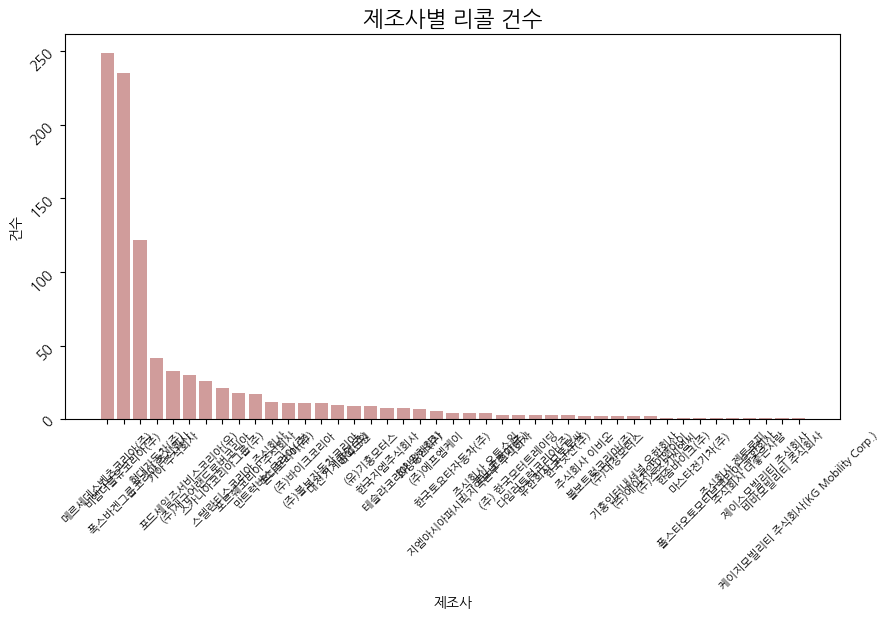

In [ ]:
plt.figure(figsize=(10, 5))
labels = temp['제작자']
values = temp['count']

bar = plt.bar(labels, values, color='#a33b39', alpha=0.5)
plt.title('제조사별 리콜 건수', fontdict={'size':16})
plt.xlabel('제조사')
plt.ylabel('건수')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45)

plt.show()

In [ ]:
# 제조사별 리콜 건수 분포 막대 그래프로 확인하기

temp = df.groupby('제작자').count()['차명'].sort_values(ascending=False).rename('count')
temp = temp.head(15)

In [ ]:
temp = temp.reset_index()

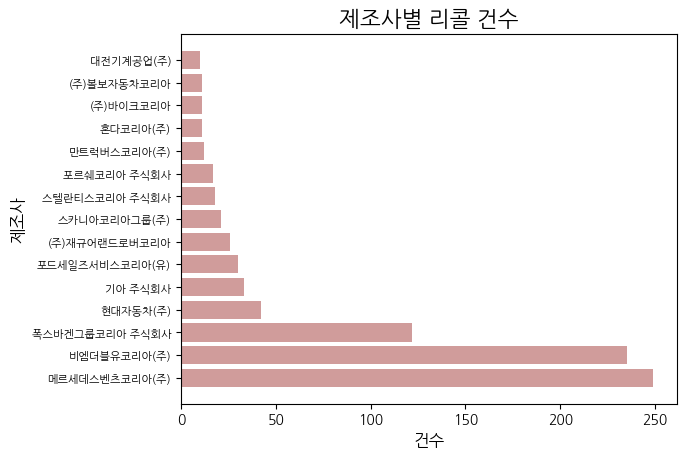

In [ ]:
labels = temp['제작자']
values = temp['count']

plt.barh(labels, values, color='#a33b39', alpha=0.5)
plt.title('제조사별 리콜 건수', fontdict={'size':16})
plt.xlabel('건수', fontsize=12)
plt.ylabel('제조사', fontsize=12)
plt.yticks(fontsize=8)
plt.show()

# **모델별 리콜 현황**

In [ ]:
pd.DataFrame(df.groupby('차명').count()['start_year'].sort_values(ascending=False)).rename(columns={'start_year':'count'}).head()

,count
차명,
스카니아카고,15
S 580 4MATIC,9
Maybach S 580 4MATIC,8
S 500 4MATIC,7
Golf 8 2.0 TDI,7


In [ ]:
temp = pd.DataFrame(df.groupby('차명').size().sort_values(ascending=False))
temp = temp.rename(columns={0:'count'})
temp = temp.reset_index()
temp

,차명,count
0,스카니아카고,15
1,S 580 4MATIC,9
2,Maybach S 580 4MATIC,8
3,S 500 4MATIC,7
4,Golf 8 2.0 TDI,7
...,...,...
630,BMW 320d Gran Turismo,1
631,Golf,1
632,GV80(JX1),1
633,GV70(JK1),1


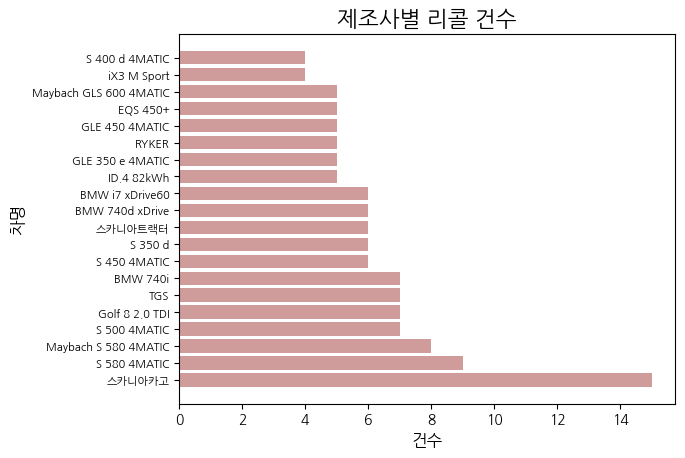

In [ ]:
labels = temp['차명'][:20]
values = temp['count'][:20]

plt.barh(labels, values, color='#a33b39', alpha=0.5)
plt.title('제조사별 리콜 건수', fontdict={'size':16})
plt.xlabel('건수', fontsize=12)
plt.ylabel('차명', fontsize=12)
plt.yticks(fontsize=8)
plt.show()

# **월별 리콜 현황**

In [ ]:
df.columns

Index(['제작자', '차명', '생산기간(부터)', '생산기간(까지)', '리콜개시일', '리콜사유', 'start_year',
       'start_month', 'start_day', 'end_year', 'end_month', 'end_day',
       'recall_year', 'recall_month', 'recall_day'],
      dtype='object')

In [ ]:
temp = pd.DataFrame(df.groupby('start_year').size().sort_values(ascending=False))
temp = temp.rename(columns={0:'count'})
temp = temp.reset_index()[:20]
temp

,start_year,count
0,2022,224
1,2021,167
2,2020,125
3,2023,108
4,2019,107
5,2018,57
6,2017,33
7,2015,22
8,2014,21
9,2016,17


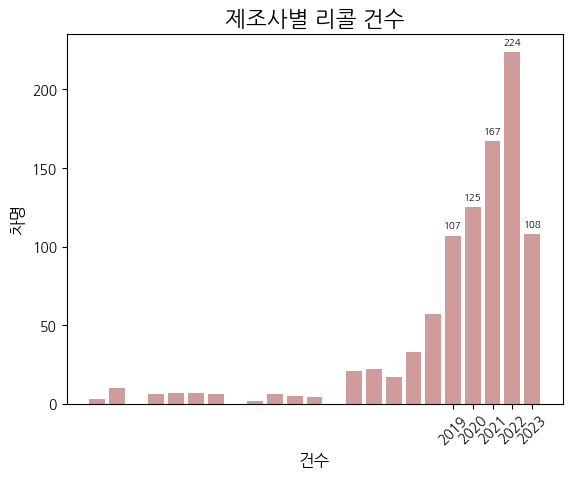

In [ ]:
labels = temp['start_year']
values = temp['count']

plt.bar(labels, values, color='#a33b39', alpha=0.5)
plt.title('제조사별 리콜 건수', fontdict={'size':16})
plt.xlabel('건수', fontsize=12)
plt.ylabel('차명', fontsize=12)
plt.xticks([2019, 2023, 2020, 2021, 2022], rotation=45)
plt.yticks()

for idx, row in temp[:5].iterrows():
    plt.text(row['start_year'], row['count']+3, str(row['count']), ha='center', va='bottom', fontsize=7)


plt.show()

In [ ]:
type(labels[0])

numpy.int64